In [1]:
#import libraries
from datetime import datetime, timedelta
from shapely.geometry import Point, Polygon
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# import dataset
northern_gannet_df = pd.read_csv("C:/Users/Dovekie/Documents/PelagicBirdProgram/datasets/noga/noga_obsv_200601-202312_masscoast_50.csv", sep='\t', index_col=["Unnamed: 0"])
weather_df = pd.read_csv("C:/Users/Dovekie/Documents/PelagicBirdProgram/datasets/noga/noga_weather_200601-202312_masscoast_50_000-012_3.csv", sep='\t', index_col=["Unnamed: 0"])

In [25]:
weather_df.shape

(31753, 30)

In [26]:
northern_gannet_df.head(50)

,OBSERVATION COUNT,LATITUDE,LONGITUDE,year,month,day,days_cos,days_sin
0,0,41.67,-70.08,2006,1,1,0.999853,0.017166
1,1,42.80,-70.81,2006,1,2,0.999411,0.034328
2,2,41.77,-70.50,2006,1,2,0.999411,0.034328
3,0,41.57,-70.51,2006,1,2,0.999411,0.034328
4,3,41.77,-70.49,2006,1,2,0.999411,0.034328
5,71,42.69,-70.62,2006,1,3,0.998674,0.051479
6,250,41.82,-70.00,2006,1,4,0.997643,0.068615
7,2,42.58,-70.66,2006,1,6,0.994700,0.102821
8,0,41.76,-70.49,2006,1,7,0.992788,0.119881
9,0,42.80,-70.81,2006,1,12,0.978856,0.204552


### Data Preprocessing

In [27]:
# take the log of each count to help the model understand the correlation better (the data is exponential)
observation_column=northern_gannet_df['OBSERVATION COUNT'].tolist()
# since log is not defined for x=0, we can convert the counts to log(x+1)
northern_gannet_df['OBSERVATION COUNT']=pd.Series([np.log(x+1) for x in observation_column])

In [28]:
noga_log=northern_gannet_df

In [29]:
# FASTER CODE: for polygonal region with few boundary points
noga_log=noga_log[noga_log['LONGITUDE']>=-70.64112479594434]
noga_log=noga_log[noga_log['LATITUDE']>=42.68138642588193]
noga_log=noga_log[noga_log['LONGITUDE']<=-70.61618444441049]
noga_log=noga_log[noga_log['LATITUDE']<=42.69585507137888]

In [ ]:
# SLOWER CODE: (for more boundary points) coordinates for a square region containing Halibut and Andrews Point, Rockport
rockport_coords = []
coord_list=[-70.64112479594434,42.68138642588193,-70.61618444441049,42.68113627754815,-70.61615355585212,42.69585507137888,-70.64109523776845,42.69590535503056,-70.64112479594434,42.68138642588193]
for x in range(len(coord_list)):
    if x%2==0:
        lng=coord_list[x]
    else:
        lat=coord_list[x]
        coord = (lng,lat)
        rockport_coords += [coord]
print(rockport_coords)

In [ ]:
# SLOWER CODE: (for more boundary points) only keep observations from Halibut and Andrews Point area
the_polygon = Polygon(rockport_coords)
for index, row in noga_log.iterrows():
    the_point = Point(row['LONGITUDE'], row['LATITUDE'])
    within_polygon = the_point.within(the_polygon)
    if within_polygon==False:
        noga_log=noga_log.drop(index)

In [30]:
# reset the index of the dataframe
indices=noga_log.index
noga_log=noga_log.reset_index(drop=True)
# only keep indices that are also in noga_largest_count
weather=weather_df.loc[indices].reset_index(drop=True)
# create new series with just the observation count
northern_gannet=noga_log['OBSERVATION COUNT']
weather_complete=pd.concat([weather, noga_log[['LATITUDE', 'LONGITUDE', 'days_cos', 'days_sin']]], axis=1)

In [31]:
northern_gannet.shape

(2093,)

In [32]:
weather_complete.head(10)

,temp000,temp003,temp006,temp009,temp012,prcp000,prcp003,prcp006,prcp009,prcp012,...,windx012,windy000,windy003,windy006,windy009,windy012,LATITUDE,LONGITUDE,days_cos,days_sin
0,1.7,2.2,0.6,0.6,1.7,0.0,0.0,0.0,0.0,0.3,...,5.6,0.0,0.0,0.0,7.6,10.1,42.69,-70.62,0.998674,0.051479
1,0.6,2.2,3.3,3.9,6.7,0.0,0.0,0.0,1.3,0.3,...,-26.8,8.5,16.6,23.3,21.7,20.1,42.69,-70.62,0.952635,0.304115
2,0.6,0.6,0.6,-2.2,-3.9,0.0,0.0,0.0,0.0,0.0,...,-0.0,-6.5,-10.4,-7.6,-0.0,-0.0,42.69,-70.63,0.916317,0.400454
3,-0.6,-1.1,0.6,1.1,2.2,0.0,0.0,0.0,0.0,0.0,...,-5.0,-10.4,-9.0,-10.1,-13.3,-14.9,42.69,-70.62,0.886680,0.462383
4,0.6,0.0,0.6,3.9,3.3,0.0,0.0,0.0,0.0,0.3,...,13.4,5.0,6.1,5.5,14.9,17.8,42.69,-70.62,0.861702,0.507415
5,11.0,9.0,6.0,3.3,3.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-6.7,-6.8,-3.8,-6.1,-0.0,42.69,-70.62,0.824855,0.565345
6,-5.0,-6.0,-8.0,-8.0,-8.0,0.0,0.0,0.0,0.0,0.0,...,-3.9,-9.4,-13.0,-8.5,-13.0,-11.7,42.69,-70.62,0.640593,0.767880
7,7.2,5.0,5.0,5.6,5.6,0.0,0.5,0.3,0.0,0.3,...,1.9,8.5,0.0,0.0,10.1,9.4,42.69,-70.62,-0.376728,0.926324
8,10.0,9.4,10.0,10.6,9.4,0.0,0.3,0.0,3.6,0.5,...,-7.4,11.7,16.6,16.6,22.3,13.3,42.69,-70.62,-0.666575,0.745438
9,7.2,7.2,8.0,8.9,8.3,2.0,3.8,0.3,2.3,9.4,...,14.9,-0.0,7.8,6.7,8.9,5.0,42.69,-70.62,-0.679273,0.733885


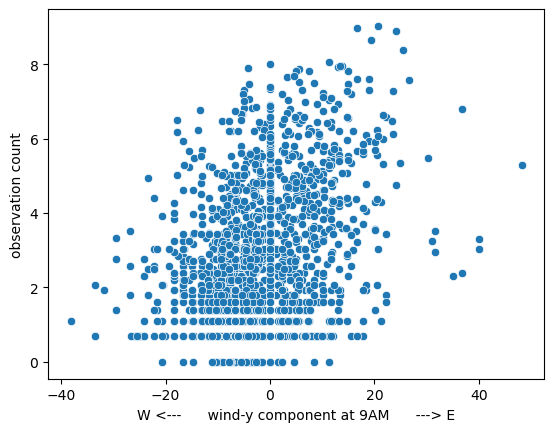

In [33]:
# plot NOGA counts vs weather parameters
counts_df=pd.concat([northern_gannet,weather_complete[['windy009']]], axis=1)
counts_df=counts_df.rename(columns={'OBSERVATION COUNT':'observation count','windy009':'W <---      wind-y component at 9AM      ---> E'})
counts=sns.scatterplot(data=counts_df, x='W <---      wind-y component at 9AM      ---> E', y='observation count')

### Train and test arrays

In [34]:
weather_windxy_cos_sin_1=weather_complete[weather_complete.columns[-14:-4]]
weather_windxy_cos_sin_2=weather_complete[weather_complete.columns[-2:]]
weather_windxy_cos_sin=pd.concat([weather_windxy_cos_sin_1, weather_windxy_cos_sin_2], axis=1)
weather_windxy_cos_sin.head(10)

,windx000,windx003,windx006,windx009,windx012,windy000,windy003,windy006,windy009,windy012,days_cos,days_sin
0,-0.0,-7.6,-0.0,1.5,5.6,0.0,0.0,0.0,7.6,10.1,0.998674,0.051479
1,2.8,0.0,-13.0,-7.2,-26.8,8.5,16.6,23.3,21.7,20.1,0.952635,0.304115
2,11.7,7.8,-0.0,-0.0,-0.0,-6.5,-10.4,-7.6,-0.0,-0.0,0.916317,0.400454
3,-7.8,-6.7,-3.4,-4.4,-5.0,-10.4,-9.0,-10.1,-13.3,-14.9,0.886680,0.462383
4,14.9,18.4,16.6,5.0,13.4,5.0,6.1,5.5,14.9,17.8,0.861702,0.507415
5,-9.0,-2.3,-6.8,-4.6,-0.0,-6.7,-6.8,-3.8,-6.1,-0.0,0.824855,0.565345
6,-1.9,-2.6,-2.8,-0.0,-3.9,-9.4,-13.0,-8.5,-13.0,-11.7,0.640593,0.767880
7,4.7,0.0,0.0,5.6,1.9,8.5,0.0,0.0,10.1,9.4,-0.376728,0.926324
8,3.9,-3.3,-9.2,-4.5,-7.4,11.7,16.6,16.6,22.3,13.3,-0.666575,0.745438
9,16.6,10.4,9.0,11.8,14.9,-0.0,7.8,6.7,8.9,5.0,-0.679273,0.733885


In [35]:
weather_0609_cos_sin_1=weather_windxy_cos_sin[weather_windxy_cos_sin.columns[2:4]]
weather_0609_cos_sin_2=weather_windxy_cos_sin[weather_windxy_cos_sin.columns[7:9]]
weather_0609_cos_sin_3=weather_windxy_cos_sin[weather_windxy_cos_sin.columns[-2:]]
weather_0609_cos_sin=pd.concat([weather_0609_cos_sin_1,weather_0609_cos_sin_2, weather_0609_cos_sin_3], axis=1)
weather_0609_cos_sin.head(10)

,windx006,windx009,windy006,windy009,days_cos,days_sin
0,-0.0,1.5,0.0,7.6,0.998674,0.051479
1,-13.0,-7.2,23.3,21.7,0.952635,0.304115
2,-0.0,-0.0,-7.6,-0.0,0.916317,0.400454
3,-3.4,-4.4,-10.1,-13.3,0.886680,0.462383
4,16.6,5.0,5.5,14.9,0.861702,0.507415
5,-6.8,-4.6,-3.8,-6.1,0.824855,0.565345
6,-2.8,-0.0,-8.5,-13.0,0.640593,0.767880
7,0.0,5.6,0.0,10.1,-0.376728,0.926324
8,-9.2,-4.5,16.6,22.3,-0.666575,0.745438
9,9.0,11.8,6.7,8.9,-0.679273,0.733885


In [36]:
X=weather_0609_cos_sin.to_numpy()
y=northern_gannet.to_numpy()

In [37]:
print(X)

[[-0.00000000e+00  1.50000000e+00  0.00000000e+00  7.60000000e+00
   9.98674090e-01  5.14787548e-02]
 [-1.30000000e+01 -7.20000000e+00  2.33000000e+01  2.17000000e+01
   9.52635381e-01  3.04114832e-01]
 [-0.00000000e+00 -0.00000000e+00 -7.60000000e+00 -0.00000000e+00
   9.16316904e-01  4.00453906e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.97643232e-01 -6.86147380e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.97643232e-01 -6.86147380e-02]
 [ 3.80000000e+00  4.60000000e+00 -6.80000000e+00 -6.10000000e+00
   1.00000000e+00 -2.44929360e-16]]


In [38]:
# normalize X values using StandardScaler() formula: z=(x-u)/s
# wind_X
windx_avg=np.mean(X[:, 0:2])
windx_std=np.std(X[:, 0:2])
X[:, 0:2]-=windx_avg
X[:, 0:2]=np.divide(X[:, 0:2], windx_std)
# wind_y
windy_avg=np.mean(X[:, 2:4])
windy_std=np.std(X[:, 2:4])
X[:, 2:4]-=windy_avg
X[:, 2:4]=np.divide(X[:, 2:4], windy_std)
# latitude
#latitude_avg=np.mean(X[:, 22])
#latitude_std=np.std(X[:, 22])
#X[:, 22]-=latitude_avg
#X[:, 22]=np.divide(X[:, 22], latitude_std)
# longitude
#longitude_avg=np.mean(X[:, 23])
#longitude_std=np.std(X[:, 23])
#X[:, 23]-=longitude_avg
#X[:, 23]=np.divide(X[:, 23], longitude_std)
# normalize y values using MinMaxScaler() formula: z=(y-min)/(max-min)
counts_min=np.min(y)
counts_max=np.max(y)
y-=counts_min
y=np.divide(y, counts_max-counts_min)
print(X)

[[-1.94890795e-01 -2.95657701e-02  2.87083145e-01  1.14983225e+00
   9.98674090e-01  5.14787548e-02]
 [-1.62770768e+00 -9.88450914e-01  2.93209028e+00  2.75045889e+00
   9.52635381e-01  3.04114832e-01]
 [-1.94890795e-01 -1.94890795e-01 -5.75665963e-01  2.87083145e-01
   9.16316904e-01  4.00453906e-01]
 ...
 [-1.94890795e-01 -1.94890795e-01  2.87083145e-01  2.87083145e-01
   9.97643232e-01 -6.86147380e-02]
 [-1.94890795e-01 -1.94890795e-01  2.87083145e-01  2.87083145e-01
   9.97643232e-01 -6.86147380e-02]
 [ 2.23932601e-01  3.12105948e-01 -4.84850268e-01 -4.05386534e-01
   1.00000000e+00 -2.44929360e-16]]


In [39]:
print(y)

[0.47369358 0.59012807 0.07677461 ... 0.07677461 0.07677461 0.07677461]


In [40]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
y_train.shape

(1465,)

### Model

In [19]:
# import dependencies
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [42]:
# custom loss function
def weighted_MSE(y_true, y_pred):
    # condition is true or false
    condition=tf.greater(y_true-y_pred, 0)
    # first option if true, second if false
    return tf.math.reduce_mean(tf.math.reduce_sum(tf.where(condition, (y_true-y_pred)**2, ((y_true-y_pred)**2)/16)))

In [51]:
# 1) 1-6: 4(), 3(.31/.27-100, .25/.23-1000); 2) 4+1: 5(); 3) <12: 10(.30/.28-100, .25/.23-1000), 8(), 6();
# create DNN model
dnn_model = keras.Sequential(
    [
        layers.Dense(6, activation="sigmoid", input_shape=(6,), name="layer1"),
        layers.Dense(6, activation="relu", name="layer2"),
        layers.Dense(1, activation="linear", name="layer3")
    ]
)
dnn_model.compile(optimizer='Adam', loss=weighted_MSE)
# train model and plot loss
model_2=dnn_model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
46/46 [==============================] - 1s 8ms/step - loss: 0.2131 - val_loss: 0.2163
Epoch 2/300
46/46 [==============================] - 0s 4ms/step - loss: 0.2027 - val_loss: 0.2136
Epoch 3/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1969 - val_loss: 0.2071
Epoch 4/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1917 - val_loss: 0.2128
Epoch 5/300
46/46 [==============================] - 0s 5ms/step - loss: 0.1907 - val_loss: 0.2003
Epoch 6/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1875 - val_loss: 0.2020
Epoch 7/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1833 - val_loss: 0.2199
Epoch 8/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1845 - val_loss: 0.2007
Epoch 9/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1811 - val_loss: 0.1977
Epoch 10/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1803 - val_loss: 0.1969
Epoch 11/

46/46 [==============================] - 0s 5ms/step - loss: 0.1704 - val_loss: 0.1933
Epoch 84/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1692 - val_loss: 0.2167
Epoch 85/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1698 - val_loss: 0.1941
Epoch 86/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1728 - val_loss: 0.1936
Epoch 87/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1690 - val_loss: 0.2091
Epoch 88/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1720 - val_loss: 0.1982
Epoch 89/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1684 - val_loss: 0.1947
Epoch 90/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1699 - val_loss: 0.2017
Epoch 91/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1702 - val_loss: 0.2064
Epoch 92/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1702 - val_loss: 0.1917
Epoch 93/300


46/46 [==============================] - 0s 4ms/step - loss: 0.1664 - val_loss: 0.1955
Epoch 165/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1701 - val_loss: 0.2014
Epoch 166/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1671 - val_loss: 0.2007
Epoch 167/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1666 - val_loss: 0.1948
Epoch 168/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1669 - val_loss: 0.1976
Epoch 169/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1666 - val_loss: 0.1959
Epoch 170/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1680 - val_loss: 0.1954
Epoch 171/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1671 - val_loss: 0.1951
Epoch 172/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1676 - val_loss: 0.1958
Epoch 173/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1671 - val_loss: 0.2218
Epoc

46/46 [==============================] - 0s 4ms/step - loss: 0.1654 - val_loss: 0.2052
Epoch 246/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1646 - val_loss: 0.2160
Epoch 247/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1671 - val_loss: 0.1992
Epoch 248/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1670 - val_loss: 0.1988
Epoch 249/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1667 - val_loss: 0.1963
Epoch 250/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1657 - val_loss: 0.2141
Epoch 251/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1655 - val_loss: 0.2106
Epoch 252/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1637 - val_loss: 0.2164
Epoch 253/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1660 - val_loss: 0.2066
Epoch 254/300
46/46 [==============================] - 0s 4ms/step - loss: 0.1649 - val_loss: 0.1973
Epoc

In [52]:
# group preds, actual counts, and observation number into one dataframe
y_pred=dnn_model.predict(X_test)
y_pred_df=pd.DataFrame(y_pred)
y_df=pd.concat([y_pred_df, pd.DataFrame(y_test)], axis=1)
y_df.columns=['preds', 'counts']

# unscale and take the exponential of the counts and preds
counts_column=y_df['counts'].tolist()
y_df['counts']=pd.Series([np.multiply(i, counts_max-counts_min) for i in counts_column])
counts_column=y_df['counts'].tolist()
y_df['counts']=pd.Series([round(np.around(np.exp(i)-1, 0), 0) for i in counts_column])
preds_column=y_df['preds'].tolist()
y_df['preds']=pd.Series([np.multiply(i, counts_max-counts_min) for i in preds_column])
preds_column=y_df['preds'].tolist()
y_df['preds']=pd.Series([round(np.around(np.exp(i)-1, 0), 0) for i in preds_column])
y_df=y_df.sort_values(by=['counts']).reset_index(drop=True)
y_df['wind-y component']=weather_complete[['windy009']]
y_df.tail(50)

20/20 [==============================] - 0s 2ms/step


,preds,counts,wind-y component
578,114.0,272.0,11.2
579,647.0,276.0,6.7
580,487.0,285.0,14.9
581,275.0,290.0,-2.7
582,186.0,300.0,-7.8
583,136.0,306.0,-7.8
584,138.0,365.0,-11.2
585,40.0,377.0,-5.4
586,157.0,380.0,3.2
587,205.0,425.0,1.6


In [53]:
ypred=y_df['preds'].tolist()
ytrue=y_df['counts'].tolist()

print(r2_score(ytrue,ypred))

0.2346794283372976


In [ ]:
#dnn_model.save("C:/Users/Dovekie/Documents/PBPP_Program/northern_gannet/noga_code/model38.keras")

In [ ]:
# plot predictions
xy=sns.scatterplot(x='wind-y component', y='value', hue='value type', style="value type", data=pd.melt(y_df, ['wind-y component'], var_name='value type', value_name='value'))
xy.set_ylim(0, 2000)

In [ ]:
# plot loss
history_data=pd.DataFrame(model_2.history)
history_data.columns=['training loss', 'validation loss']
shift_index=[]
for i in range(1, 301):
    shift_index.append(i)
history_data.index=shift_index
history_data['epochs']=shift_index
g = sns.lineplot(x='epochs', y='loss', hue='loss type', data=pd.melt(history_data, ['epochs'], var_name='loss type', value_name='loss'))
g.set_ylim(0, 1)
g.set_xlim(0, 300)

In [ ]:
from meteostat import Point, Daily, Hourly, Stations

In [ ]:
def get_weather(latitude, longitude, month, day, year):
    # find nearest station
    stations = Stations()
    stations = stations.nearby(latitude, longitude)
    station = stations.fetch(2)
    station=station.index
    defective_stations=['72506', '74492', '74494', 'KNZW0']
    # pick a non-defective station
    if station[0] in defective_stations:
        station = station[1]
    else:
        station = station[0]
    # hourly data for station
    weather_for_day=pd.DataFrame(index=[0], columns=['temp', 'prcp', 'wind_x', 'wind_y'])
    start = datetime(year, month, day, 0, 00)
    end = datetime(year, month, day, 12, 00)
    stn = Hourly(station, start, end)
    stn = stn.fetch()
    # fill missing rows of hourly weather with rows of NaN values
    times=[
        datetime(start.year, start.month, start.day, 0, 00),
        datetime(start.year, start.month, start.day, 1, 00),
        datetime(start.year, start.month, start.day, 2, 00),
        datetime(start.year, start.month, start.day, 3, 00), 
        datetime(start.year, start.month, start.day, 4, 00),
        datetime(start.year, start.month, start.day, 5, 00),
        datetime(start.year, start.month, start.day, 6, 00),
        datetime(start.year, start.month, start.day, 7, 00),
        datetime(start.year, start.month, start.day, 8, 00),
        datetime(start.year, start.month, start.day, 9, 00),
        datetime(start.year, start.month, start.day, 10, 00),
        datetime(start.year, start.month, start.day, 11, 00),
        datetime(start.year, start.month, start.day, 12, 00),
    ]
    nan_row=pd.Series({"temp":np.nan, "dwpt":np.nan, "rhum":np.nan, "prcp":np.nan, "snow": np.nan, "wdir":np.nan, "wspd":np.nan, "wpgt":np.nan, "pres":np.nan, "tsun":np.nan, "coco":np.nan})
    for time in times:
        if time not in stn.index:
            stn=pd.concat([stn, nan_row.to_frame(time).T])
    stn=stn.sort_index()
    # filter to every 3 hrs
    counter=-1 
    for index, row in stn.iterrows():
        counter+=1  
        if counter%3!=0:
            stn=stn.drop(index)
    # replace NaNs
    stn['prcp']=stn['prcp'].fillna(0)
    stn['temp']=stn['temp'].interpolate(method='linear', limit_direction='both')
    stn['wdir']=stn['wdir'].interpolate(method='linear', limit_direction='both')
    stn['wspd']=stn['wspd'].interpolate(method='linear', limit_direction='both')
    # create a list for each parameter
    stn_temp=stn['temp'].tolist()
    stn_prcp=stn['prcp'].tolist()
    stn_wdir=stn['wdir'].tolist()
    stn_wspd=stn['wspd'].tolist()
    # convert wind speed and wind direction into x and y components
    stn_wind_x=[]
    stn_wind_y=[]
    for i in range(5):
        cosine=np.around(np.cos(np.deg2rad(stn_wdir[i])), decimals=1)
        sine=np.around(np.sin(np.deg2rad(stn_wdir[i])), decimals=1)
        hourly_wind_x=np.around(float(stn_wspd[i])*cosine, decimals=1)
        hourly_wind_y=np.around(float(stn_wspd[i])*sine, decimals=1)
        stn_wind_x.append(hourly_wind_x)
        stn_wind_y.append(hourly_wind_y)
    stn_wind_x=pd.Series(stn_wind_x, dtype=object).fillna(0).tolist()
    stn_wind_y=pd.Series(stn_wind_y, dtype=object).fillna(0).tolist()
    # create a dataframe
    temp_df=pd.DataFrame([stn_temp], columns=['temp000','temp003','temp006','temp009','temp012'])
    prcp_df=pd.DataFrame([stn_prcp], columns=['prcp000','prcp003','prcp006','prcp009','prcp012'])
    wdir_df=pd.DataFrame([stn_wdir], columns=['wdir000','wdir003','wdir006','wdir009','wdir012'])
    wspd_df=pd.DataFrame([stn_wspd], columns=['wspd000','wspd003','wspd006','wspd009','wspd012'])
    windx_df=pd.DataFrame([stn_wind_x], columns=['windx000','windx003','windx006','windx009','windx012'])
    windy_df=pd.DataFrame([stn_wind_y], columns=['windy000','windy003','windy006','windy009','windy012'])
    weather_for_day=pd.concat([windx_df,windy_df], axis=1)
    # add day using day_in_the_year function
    def days_in_a_year(month, day):
        return np.piecewise(1, [month==1, month==2, month==3, month==4, month==5, month==6, month==7, month==8, month==9, month==10, month==11, month==12], [day,31+day,60+day,91+day,121+day,152+day,182+day,213+day,244+day,274+day,305+day,335+day])
    weather_for_day['days_cos']=np.cos(np.deg2rad(days_in_a_year(month, day)*(60/61)))
    weather_for_day['days_sin']=np.sin(np.deg2rad(days_in_a_year(month, day)*(60/61)))
    return weather_for_day

In [ ]:
def df_to_numpy_scaled(weather_for_day):
    # keep specific columns
    weather_0609_cos_sin_1=weather_for_day[weather_for_day.columns[2:4]]
    weather_0609_cos_sin_2=weather_for_day[weather_for_day.columns[7:9]]
    weather_0609_cos_sin_3=weather_for_day[weather_for_day.columns[-2:]]
    weather_0609_cos_sin=pd.concat([weather_0609_cos_sin_1,weather_0609_cos_sin_2, weather_0609_cos_sin_3], axis=1)
    # convert dataframe to numpy array
    x_test=weather_0609_cos_sin.to_numpy()
    # scale weather parameters, latitude, and longitude, so that the standard deviation is 1
    # normalize X values using StandardScaler() formula: z=(x-u)/s
    # wind_X
    x_test[0, 0:2]-=windx_avg
    x_test[0, 0:2]=np.divide(x_test[0, 0:2], windx_std)
    # wind_y
    x_test[0, 2:4]-=windy_avg
    x_test[0, 2:4]=np.divide(x_test[0, 2:4], windy_std)
    return x_test

In [ ]:
def predict_northern_gannets(latitude, longitude, month, day, year, count, weather):
    # create x_test
    x_test=df_to_numpy_scaled(get_weather(latitude, longitude, month, day, year))
    # predict number of nogas
    noga_count=dnn_model.predict(x_test, verbose=0)
    # the noga count in scaled so we unscale it
    noga_count=float(str(noga_count).replace("[", "").replace("]", ""))
    # get original count by using the formula: y=z*(max-min)+min
    noga_count=np.multiply(noga_count, counts_max-counts_min)
    noga_count+=counts_min
    noga_count=round(np.exp(noga_count)-1,0)
    noga_prediction='Actual Count: '+str(count)+'\tPred: '+str(noga_count)+'\tWeather: '+str(weather)+'\tDay: '+str(month)+'/'+str(day)+'/'+str(year)
    print('___________________________________________________________________________________________')
    return noga_prediction

In [ ]:
print(predict_northern_gannets(42.691015, -70.631701, 8, 30, 2024, 10, 'ESE, 10 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 1, 29, 2024, 0.0, 'N, 5 mph'))
# count: 1; SE, 5-12 mph
print(predict_northern_gannets(42.691015, -70.631701, 1, 28, 2024, 1.0, 'SE, 5-12 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 1, 10, 2024, 180, 'ENE, 5-10 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 5, 28, 2024, 823, 'S, 10-15 mph'))

print(predict_northern_gannets(42.691015, -70.631701, 1, 17, 2024, '~0-10', 'WNW, 10 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 2, 10, 2024, 0.0, 'WSW, 0-5 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 1, 13, 2024, 459, 'ESE, 30-45 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 11, 1, 2023, 500, 'E, 5-10 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 4, 23, 2023, 78, 'E, 20-25 mph'))

# count: 63; SE, 10-20 mph
print(predict_northern_gannets(42.691015, -70.631701, 12, 17, 2023, 63, 'SE, 10-20 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 11, 30, 2023, 4.0, '---, 2 mph'))
# count: 848; SE, 25-35 mph 
print(predict_northern_gannets(42.691015, -70.631701, 11, 22, 2023, 1450, 'SE, 25-35 mph'))
# count: 265; N, 6 mph
print(predict_northern_gannets(42.691015, -70.631701, 11, 6, 2023, 265, 'N, 6 mph'))
# count: 46; N, 10 mph
print(predict_northern_gannets(42.691015, -70.631701, 10, 1, 2023, 46, 'N, 10 mph'))
# count: 475; NW, 30-35 mph
print(predict_northern_gannets(42.691015, -70.631701, 9, 16, 2023, 475, 'NW, 30-35 mph'))
# count: 1; S, 10-20 mph
print(predict_northern_gannets(42.691015, -70.631701, 7, 16, 2023, 1.0, 'S, 10-20 mph'))
print(predict_northern_gannets(42.691015, -70.631701, 4, 16, 2023, '~1', '---, - mph'))
# count: 2; NNE, 20-30 mph
print(predict_northern_gannets(42.691015, -70.631701, 3, 11, 2023, 2.0, 'NNE, 20-30 mph'))
print('************ ***********************************************************************')
# count: 295; E-ENE, 25-45 mph
print(predict_northern_gannets(42.691015, -70.631701, 12, 16, 2022, 295, 'ENE, 25-45 mph'))
# count: ~1500; E, 20-30 mph
print(predict_northern_gannets(42.691015, -70.631701, 10, 2, 2022, 1500, 'E, 20-30 mph'))
# count: 31; W, 10-15 mph
print(predict_northern_gannets(42.691015, -70.631701, 8, 31, 2022, 31, 'W, 10-15 mph'))
# count: 11; W, 5-10 mph
print(predict_northern_gannets(42.691015, -70.631701, 7, 8, 2022, 11, 'W, 5-10 mph'))
# count: 115, -, - mph
print(predict_northern_gannets(42.691015, -70.631701, 11, 13, 2021, 115, '-, --- mph'))